<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,71.604641,69.879841,0.000120,151.484601,151.484443,0.000158
1,0.0,1.0,26.472582,52.742024,0.000563,89.215169,89.214867,0.000301
2,0.0,2.0,32.423102,34.100527,0.000588,76.524218,76.523905,0.000313
3,0.0,3.0,73.056382,48.066121,-0.000080,131.122423,131.122512,-0.000089
4,0.0,4.0,38.211705,58.795194,-0.000149,107.006750,107.007078,-0.000328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,92.121075,96.472091,0.000084,198.593250,198.593206,0.000044
119996,999.0,116.0,48.717038,85.701692,-0.000075,144.418655,144.418679,-0.000024
119997,999.0,117.0,27.959569,58.853481,0.000363,96.813413,96.813043,0.000370
119998,999.0,118.0,52.881566,57.533420,0.000168,120.415154,120.415061,0.000093


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,71.604641,69.879841,0.000120,151.484601,151.484443,0.000158
1,0.0,1.0,26.472582,52.742024,0.000563,89.215169,89.214867,0.000301
2,0.0,2.0,32.423102,34.100527,0.000588,76.524218,76.523905,0.000313
3,0.0,3.0,73.056382,48.066121,-0.000080,131.122423,131.122512,-0.000089
4,0.0,4.0,38.211705,58.795194,-0.000149,107.006750,107.007078,-0.000328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,92.121075,96.472091,0.000084,198.593250,198.593206,0.000044
119996,999.0,116.0,48.717038,85.701692,-0.000075,144.418655,144.418679,-0.000024
119997,999.0,117.0,27.959569,58.853481,0.000363,96.813413,96.813043,0.000370
119998,999.0,118.0,52.881566,57.533420,0.000168,120.415154,120.415061,0.000093


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    71.604641  69.879841  0.000120  151.484601  151.484443  0.000158
      1.0    26.472582  52.742024  0.000563   89.215169   89.214867  0.000301
      2.0    32.423102  34.100527  0.000588   76.524218   76.523905  0.000313
      3.0    73.056382  48.066121 -0.000080  131.122423  131.122512 -0.000089
      4.0    38.211705  58.795194 -0.000149  107.006750  107.007078 -0.000328
...                ...        ...       ...         ...         ...       ...
999.0 115.0  92.121075  96.472091  0.000084  198.593250  198.593206  0.000044
      116.0  48.717038  85.701692 -0.000075  144.418655  144.418679 -0.000024
      117.0  27.959569  58.853481  0.000363   96.813413   96.813043  0.000370
      118.0  52.881566  57.533420  0.000168  120.415154  120.415061  0.000093
      119.0  72.216258  52.410303  0.000627  134.627188  134.626716  0.000472

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    71.604641  69.879841  0.000120  151.484601  151.484443  0.000158
      1.0    26.472582  52.742024  0.000563   89.215169   89.214867  0.000301
      2.0    32.423102  34.100527  0.000588   76.524218   76.523905  0.000313
      3.0    73.056382  48.066121 -0.000080  131.122423  131.122512 -0.000089
      4.0    38.211705  58.795194 -0.000149  107.006750  107.007078 -0.000328
...                ...        ...       ...         ...         ...       ...
999.0 115.0  92.121075  96.472091  0.000084  198.593250  198.593206  0.000044
      116.0  48.717038  85.701692 -0.000075  144.418655  144.418679 -0.000024
      117.0  27.959569  58.853481  0.000363   96.813413   96.813043  0.000370
      118.0  52.881566  57.533420  0.000168  120.415154  120.415061  0.000093
      119.0  72.216258  52.410303  0.000627  134.627188  134.626716  0.000472

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,71.604641,69.879841,0.000120,151.484601,151.484443,0.000158
1,0.0,1.0,26.472582,52.742024,0.000563,89.215169,89.214867,0.000301
2,0.0,2.0,32.423102,34.100527,0.000588,76.524218,76.523905,0.000313
3,0.0,3.0,73.056382,48.066121,-0.000080,131.122423,131.122512,-0.000089
4,0.0,4.0,38.211705,58.795194,-0.000149,107.006750,107.007078,-0.000328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,92.121075,96.472091,0.000084,198.593250,198.593206,0.000044
119996,999.0,116.0,48.717038,85.701692,-0.000075,144.418655,144.418679,-0.000024
119997,999.0,117.0,27.959569,58.853481,0.000363,96.813413,96.813043,0.000370
119998,999.0,118.0,52.881566,57.533420,0.000168,120.415154,120.415061,0.000093


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    71.604641  69.879841  0.000120  151.484601  151.484443  0.000158
      1.0    26.472582  52.742024  0.000563   89.215169   89.214867  0.000301
      2.0    32.423102  34.100527  0.000588   76.524218   76.523905  0.000313
      3.0    73.056382  48.066121 -0.000080  131.122423  131.122512 -0.000089
      4.0    38.211705  58.795194 -0.000149  107.006750  107.007078 -0.000328
...                ...        ...       ...         ...         ...       ...
999.0 115.0  92.121075  96.472091  0.000084  198.593250  198.593206  0.000044
      116.0  48.717038  85.701692 -0.000075  144.418655  144.418679 -0.000024
      117.0  27.959569  58.853481  0.000363   96.813413   96.813043  0.000370
      118.0  52.881566  57.533420  0.000168  120.415154  120.415061  0.000093
      119.0  72.216258  52.410303  0.000627  134.627188  134.626716  0.000472

[120000 rows x 6 columns]

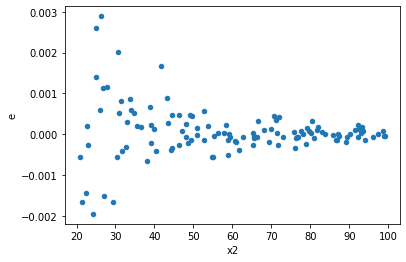

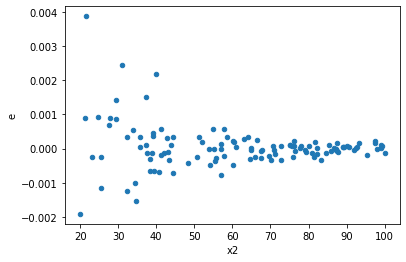

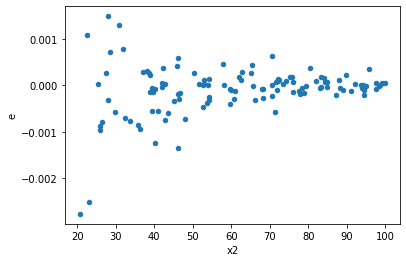

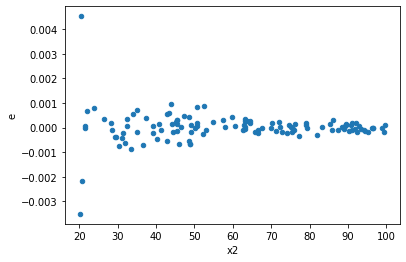

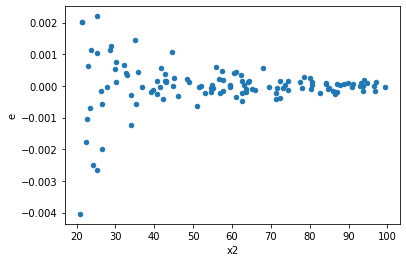

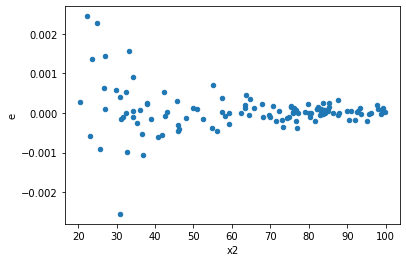

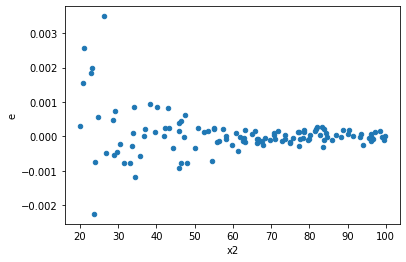

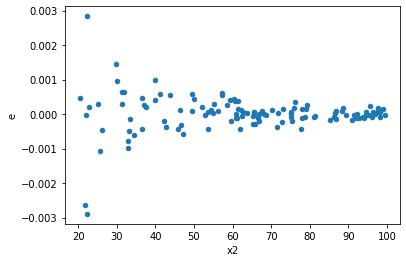

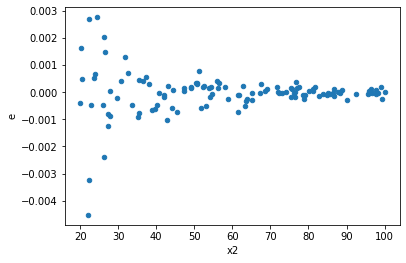

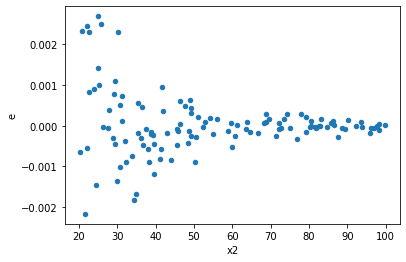

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,3.013101407869436e-05,4.391917442084608e-06,6.550220451890078e-07,9.547646613227409e-08,0.14576069131341096,1.2065418017198049e-09,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,4.394263655718357e-05,1.0156994910213745e-06,9.552747077648602e-07,2.2080423717855968e-08,0.023114213679455063,7.038808693456871e-26,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,1.862683960860772e-05,4.167470568970185e-06,4.0493129583929827e-07,9.059718628196054e-08,0.2237347105863487,1.2910595723016787e-06,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,4.1959569841737256e-05,1.5216434889492226e-06,9.121645617768968e-07,3.3079206281504836e-08,0.03626451593018099,1.265102778957041e-21,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,3.5190635350573375e-05,4.042287727722217e-06,7.650138119689864e-07,8.787582016787429e-08,0.11486827922975693,1.670919680624644e-11,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,1.900731562988958e-05,8.821286435128032e-07,4.1320251369325176e-07,1.9176709641582677e-08,0.04640995397191327,2.3980748784352216e-19,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,3.9198837017382196e-05,1.7190738154426338e-06,8.521486308126564e-07,3.737116990092682e-08,0.04385522495681017,7.261328177768145e-20,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,3.2812463902431304e-05,1.4679719693856897e-06,7.1331443266155e-07,3.191243411708021e-08,0.044738242569980165,1.1065704014664916e-19,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,6.40684763213996e-05,2.149244967641202e-06,1.392792963508687e-06,4.672271668785222e-08,0.033546060263077146,2.366036313205022e-22,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    997
Reject001=1 : Homoscedasticity        3
Name: Result_test, dtype: int64